In [3]:
import pandas as pd

import altair as alt
alt.data_transformers.disable_max_rows()

import matplotlib.pyplot as plt


from vega_datasets import data
mtcars = data.cars()

## Set Altair default size

def theme_fm(*args, **kwargs):
    return {'height': 220,
            'width' : 220,
            'config': {'style': {'circle': {'size': 400},
                                'point': {'size': 30},
                                'square': {'size': 400},
                                },
                       'legend': {'symbolSize': 20, 'titleFontSize': 20, 'labelFontSize': 20}, 
                       'axis': {'titleFontSize': 20, 'labelFontSize': 20}},
            }

alt.themes.register('theme_fm', theme_fm)
alt.themes.enable('theme_fm')

ThemeRegistry.enable('theme_fm')

# Exploratory Data Analysis with Altair

<img src="imgs/viz.jpg" align="center" width=100%>

<p style="text-align:left;">
    Photo by <a href="https://www.pexels.com/@rodnae-prod">RODNAE Productions</a> from <a href="https://www.pexels.com/photo/magnifying-glass-on-white-paper-7948038/">Pexels</a>
    <span style="float:right;">
        March 25, 2022 <br>
        Firas Moosvi
    </span>
</p>

## Learning Context (5 mins)

<img src="imgs/image.jpg" width=50% align="center">

### Academic program:

- Year 2 of the iSchool Master of Information program
- Concentration: Primarily HCDS students, some UXD, and C&T

### Course Details

- INF 2190 - Data Analytics: Introduction, Methods and Practical Approaches
- **Prerequisite**:
    - INF 1003 - Information Systems, Services and Design
    - INF 1340 - Programming for Data Science
    - INF 1343 - Data Modeling and Database Design
- Elective course
- This course has a lot of technical courses as pre-requisites, so few students will be eligible to take it.
- Most would rather be learning more about AI, machine learning, and neural networks 😅

### Course Schedule

- Week 1: Introduction to Data Mining
- Week 2: Data Types
- Week 3: Data Preparation with Pandas in Python
- Week 4: This lesson (Exploratory Data Analysis)

### Programming Experience

- Least experienced: Three terms of Data Science courses
- Most experienced:  Experienced software developers and data engineers (2+ years of experience)
    - Prior knowledge (and preference) for other python visualization packages (`matplotlib` and/or `seaborn`)
- ~ 30 students in the class

In [10]:
## We'll be using the mtcars dataset for the first part of this lecture

mtcars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


### Learning Intentions

- Explain the difference between declarative and imperative syntax.

- Describe the 6 components of the visualization grammar.

- Construct data visualizations using Altair.

- Add interactivity to Altair plots.

- Establish the importance of Exploratory Data Analysis.

## Starting with the punchline!

By the end of class today, you will learn how to make this chart using the `mtcars` dataset:

In [11]:
base = alt.Chart(mtcars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Column('Origin')
) 

base.interactive()

alt.Chart(...)

### In matplotlib:

If you're familiar with `matplotlib`, this should illustrate to you **how** Altair is different - not better or worse, just *differently sane* (h/t [Greg Wilson](https://tidynomicon.tech)).

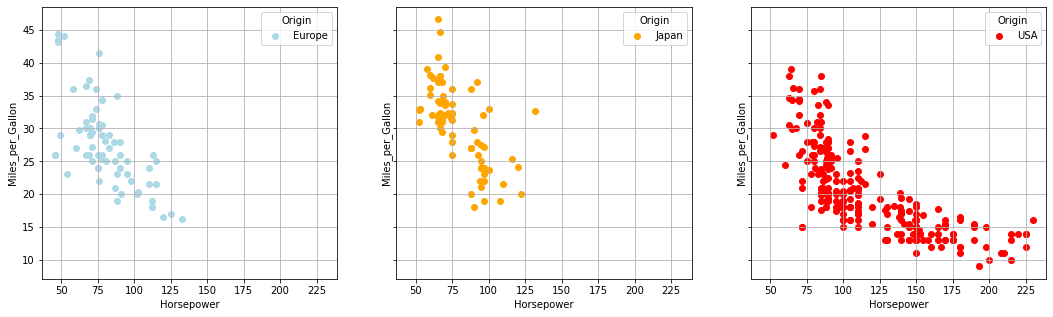

In [12]:
colour_map = dict(zip(mtcars['Origin'].unique(), ['red','lightblue','orange']))
n_panels = len(colour_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 6, 5),
                       sharex = True, sharey = True)

for i, (country,group) in enumerate(mtcars.groupby('Origin')):
    ax[i].scatter(group['Horsepower'],
                  group['Miles_per_Gallon'],
                  label = country,
                  color = colour_map[country])
    ax[i].legend(title='Origin')
    ax[i].grid()
    ax[i].set_xlabel('Horsepower')
    ax[i].set_ylabel('Miles_per_Gallon')

## Introduction to Altair (15 mins)

<img src="imgs/Visualization-Grammar1.jpeg" align="center" width=100%>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### Why do we need a visualization grammar?

In [13]:
# Altair: Declarative

base = alt.Chart(mtcars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Column('Origin')
)

base

alt.Chart(...)

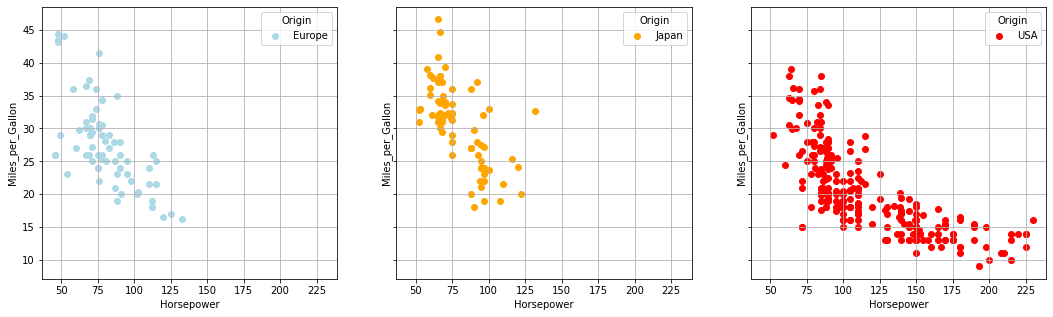

In [14]:
# Matplotlib: Imperative

colour_map = dict(zip(mtcars['Origin'].unique(), ['red','lightblue','orange']))
n_panels = len(colour_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 6, 5),
                       sharex = True, sharey = True)

for i, (country,group) in enumerate(mtcars.groupby('Origin')):
    ax[i].scatter(group['Horsepower'],
                  group['Miles_per_Gallon'],
                  label = country,
                  color = colour_map[country])
    ax[i].legend(title='Origin')
    ax[i].grid()
    ax[i].set_xlabel('Horsepower')
    ax[i].set_ylabel('Miles_per_Gallon')

<center>
    <img src="imgs/Visualization-Grammar8.jpeg">
</center>

Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

<center>
    <img src="imgs/Visualization-Grammar2.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 1. Tabular Data

Data in Altair is built around the [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

The fundamental object in Altair is the ``Chart``. It takes the dataframe as a single argument:

```chart = alt.Chart(DataFrame)```

Let's create a simple `DataFrame` to visualize, with a categorical data in the `Letters` column and numerical data in the `Numbers` column:

In [15]:
df = pd.DataFrame({'Letters': list('CCCDDDEEE'),
                     'Numbers': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
df.T

,0,1,2,3,4,5,6,7,8
Letters,C,C,C,D,D,D,E,E,E
Numbers,2,7,4,1,2,6,8,4,7


In [16]:
plot = alt.Chart(df)

#plot 

<center>
    <img src="imgs/Visualization-Grammar3.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 2. Chart Marks

Next we can decide what sort of *mark* we would like to use to represent our data.

Here are some of the more commonly used `mark_*()` methods supported in Altair and Vega-Lite; for more detail see [Marks](https://altair-viz.github.io/user_guide/marks.html) in the Altair documentation:

|Mark|
|------|
|`mark_area()`|
|`mark_bar()`|
|`mark_circle()`, `mark_point`, `mark_square`|
|`mark_rect()`|
|`mark_line()`|
|`mark_rule()`|
|`mark_text()`|
|`mark_image()`|

Let's add a mark_point() to our plot:

In [17]:
plot = alt.Chart(df).mark_point()

plot

alt.Chart(...)

😒 

We have a plot now, but clearly we're being pranked: all the data points collapsed to one location! Why ?

<center>
    <img src="imgs/Visualization-Grammar4.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

A visual encoding specifies how a given data column should be **mapped** onto *visual properties* of the visualization.

Some of the more frequently used visual encodings are listed on the right:






For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

|Encoding| What does it encode?
|--------|--------------------|
|`X`| x-axis value | 
|`Y`| y-axis value |
|`Color`| color of the mark |
|`Opacity`| transparency/opacity of the mark |
|`Shape`| shape of the mark |
|`Size`| size of the mark |
|`Row`| row within a grid of facet plots |
|`Column`| column within a grid of facet plots |

Let's add an encoding so the data is mapped to the x and y axes:

In [18]:
plot = alt.Chart(df).mark_point().encode(alt.X('Numbers'))

plot

# We still haven't encoded any of the data to the Y-axis!

alt.Chart(...)

#### Activity : You Try!

Encode the `Letters` column at the `y` position to make the visualization more useful.

In [19]:
plot = alt.Chart(df).mark_point().encode(alt.X('Numbers'),
                                         alt.Y('Letters'),
                                         )
# first chart
plot.encode(alt.Y('Col1'))

plot.encode(alt.Y('Col2'))
plot

alt.Chart(...)

#### Activity : You Try!

Change the `mark` from `mark_point()` to `mark_circle` or `mark_square`

In [20]:
plot = plot ## YOUR SOLUTION HERE

plot.mark_circle()

alt.Chart(...)

#### Activity : You Try!

What do you think will happen when you try to change the `mark_circle` to a `mark_bar()`

In [21]:
plot.mark_bar() ## YOUR SOLUTION HERE

alt.Chart(...)

<center>
    <img src="imgs/Visualization-Grammar5.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 4. Transforms

Though Altair supports a few built-in data transformations and aggregations, in general I **do not suggest** you use them.

Some reasons why:

- Not all functions are available
- You already know how to do complex wrangling using pandas
- No opportunity to write tests if wrangling is done within plots
- Single point of failure
- Syntax is non-trivial and not very "pythonic"
- Code is less readable and harder to document

<center>
    <img src="imgs/Visualization-Grammar6.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 5. Scale

The scale parameter controls axis limits, axis types (`log`, `semi-log`, etc...).

For a complete description of the available options, see the [Scales and Guides](https://altair-viz.github.io/user_guide/scale_resolve.html) section of the documentation.

In [22]:
plot = alt.Chart(df).mark_point().encode(
            alt.X('Numbers'),
            alt.Y('Letters'))

plot.encode(alt.X('Numbers', 
                  scale = alt.Scale(type='log')))

alt.Chart(...)

<center>
    <img src="imgs/Visualization-Grammar7.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 6. Guide

The guides component deals with legends and annotations that "guide" our interpretation of the data. In most cases you will not need to work with this component very much as the defaults are pretty good!

For a complete description of the available options, see the [Scales and Guides](https://altair-viz.github.io/user_guide/scale_resolve.html) section of the documentation.

## Interactive Altair (5 mins)

In [23]:
# Altair 

## To uncomment the code chunk below, select it
## and press Command + / (or Control + /)

first_chart = alt.Chart(mtcars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Row('Origin')
)
first_chart.interactive()

alt.Chart(...)

### One more thing...

In [24]:
chart = alt.Chart(mtcars).mark_point().encode(
            alt.Y('Horsepower'),
            alt.X('Miles_per_Gallon')).interactive()

# Combine multiple charts together

chart

alt.Chart(...)

## Motivating the need for EDA (20 mins)

- Let's put our new skills to work with an example dataset!

### Scenario

You have been given a dataset and tasked with trying to solve a problem.
In WW2, expensive fighter planes were going down quite frequently due to bullet fire.
The military decided to conduct an analysis and surveyed all the surviving planes in an effort to catalogue which regions of the plane should be reinforced.

With limited resources, the military could only reinforce a maximum of two zones.

**Your task is to look at the bullet data for the planes and help determine which areas of the plane should be reinforced.**

You're given a schematic of the plane, and told that the workers added a grid to the schematic, divided it up into regions A,B,C,D,E and recorded a value of 1 wherever there was a bullet hole across all the planes that returned.

Areas without bullet holes are marked as 0.
They gave you a csv file with this information called [`bullet_data.csv`](https://github.com/firasm/bits/raw/master/bullet_data.csv).

Yes, these WW2 workers are very sophisticated and had access to a fancy computer!

<img src="imgs/plane.png" width=50% align="center">

`bullet_data.csv` is available here: https://github.com/firasm/bits/raw/master/bullet_data.csv

In [4]:
df = pd.read_csv('https://github.com/firasm/bits/raw/master/bullet_data.csv')
df.head()

,x,y,bullet,zone
0,0,0,0.0,OutsidePlane
1,0,1,0.0,OutsidePlane
2,0,2,0.0,OutsidePlane
3,0,3,0.0,OutsidePlane
4,0,4,0.0,OutsidePlane


In [5]:
# Use our standard tool first:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,87500.0,124.500000,72.168619,0.0,62.0,124.5,187.0,249.0
y,87500.0,174.500000,101.036462,0.0,87.0,174.5,262.0,349.0
bullet,68526.0,0.008741,0.093086,0.0,0.0,0.0,0.0,1.0


`describe()` didn't quite organize the data like the way we wanted, let's try and figure out some more info manually.

In [6]:
print("The zones are: {0}".format(sorted(set(df['zone']))),"\n")

print("Columns are: {0}".format(list(df.columns)),"\n")

print("Values for 'bullet' column is {0}".format(sorted(df['bullet'].unique())),"\n")

The zones are: ['A', 'B', 'C', 'D', 'E', 'OutsidePlane', 'Unknown'] 

Columns are: ['x', 'y', 'bullet', 'zone'] 

Values for 'bullet' column is [0.0, nan, 1.0] 



Let's wrangle the data a bit to try and see what's going on:

In [7]:
# First, only consider the bullet 'hits':

hits_df = df[df['bullet']==1]
hits_df.sample(5)

,x,y,bullet,zone
35423,101,73,1.0,A
77483,221,133,1.0,E
42873,122,173,1.0,D
40046,114,146,1.0,B
26407,75,157,1.0,B


In [8]:
# Then, let's groupby the "zone" and look at the resulting dataframe
# I have "reset" the index of the groupby object so we can have a continuous index

summary = hits_df.groupby('zone').count().reset_index()
summary

,zone,x,y,bullet
0,A,83,83,83
1,B,259,259,259
2,C,83,83,83
3,D,47,47,47
4,E,111,111,111
5,Unknown,16,16,16


In [9]:
hits_df

,x,y,bullet,zone
24303,69,153,1.0,B
24308,69,158,1.0,B
24341,69,191,1.0,B
24629,70,129,1.0,B
24636,70,136,1.0,B
...,...,...,...,...
83874,239,224,1.0,E
84149,240,149,1.0,E
84487,241,137,1.0,Unknown
84518,241,168,1.0,Unknown


In [32]:
alt.Chart(hits_df).mark_bar().encode(
    alt.X("count()", title="Bullet Hits"), alt.Y("zone:N", title="")
).properties(title="Bullet hit count by Airplane Zone").configure_title(anchor="start")

alt.Chart(...)

In [33]:
# Final Plot here

### Debrief

- Look at your data!
- Talk to someone about your data!
- Look at your data another way!
- Think about your data and what it means!
- Exploratory Data Analysis is **essential**!

## Preview of Next class (1 min)

We will:

- Formalize some principles of Exploratory Data Analysis.

- Discuss how to develop and create research questions to guide your analysis.

- Explore more Altair features!

## Summary (5 mins)

### 1. Introduction to the Visualization Grammar

<img src="imgs/Visualization-Grammar9.jpeg" align="center" width=60%>

### 2. Altair syntax

- Marks and encoding.
- Declarative vs. Imperative.
- Built-in interactivity.

### 3. Importance of Exploratory Data Analysis

- Look at your data.
- Talk to someone about your data.
- Look at your data another way.
- Think about your data and what it means!

### Summary of Learning Intentions

- Explain the difference between declarative and imperative syntax.

- Describe the 6 components of the visualization grammar.

- Construct data visualizations using Altair.

- Add interactivity to Altair plots.

- Establish the importance of Exploratory Data Analysis.

## Activity: You Try (homework)

- Task: Select a plot from the ["Interactive Charts" section of the Altair gallery](https://altair-viz.github.io/gallery/index.html#interactive-charts) and reproduce the plot in a Jupyter Notebook.

<img src="imgs/altair_gallery.png" width=60% align="center">

We will review these examples at the start of next class!

### Acknowledgements

- Altair development team
    - [Eitan Lees for his slides on the Visualization Grammar](https://speakerdeck.com/eitanlees/visualization-grammar)
    - [Jake VanderPlas](https://github.com/jakevdp) for his thousands of StackOverflow and GitHub answers related to Altair)
- MDS-V academic teaching team for their ideas and feedback


## Appendix

### Adding Brush Selections and Tooltips

In [34]:
# starting with the same plot we started with this lecture...

base = (
    alt.Chart(mtcars).mark_point(size=40).encode(
        alt.X("Horsepower"),
        alt.Y("Miles_per_Gallon"),
        alt.Color("Origin"),
        alt.Column("Origin"),
    )
    .properties(width=250, height=200)
)

base

# With just a few lines of code, we can make some magic...

alt.Chart(...)

In [35]:
## New code - to be discussed next week!

brush = alt.selection(type="interval")

base = base.encode(
    color=alt.condition(brush, "Origin", alt.ColorValue("gray")),
    tooltip=["Name", "Origin", "Horsepower", "Miles_per_Gallon"],
).add_selection(brush)
base


alt.Chart(...)

### Technical Details about the Altair Library

![](imgs/02-altair-stack.png)

[Credit: Eitan Lees](https://eitanlees.github.io/altair-stack/)

Contrary to other plotting libraries, in Altair, every dataset must be provided as either:

- a Dataframe, OR 
- a URL to a `json` or `csv` file
- GeoJSON objects (for maps)

The URL passed in, is turned into a dataframe behind the scenes. 

See [Defining Data](https://altair-viz.github.io/user_guide/data.html) in the Altair documentation for more details.

Altair is able to automatically determine the type of the variable using built-in heuristics. 

That being said, it is definitely **very GOOD practice** to specify the `encoding` explicitly.

There are four possible data types and Altair provides a useful shortcode to specify them: :

| Data Type | Description | Shortcode| 
| ----------| ----------- | ---------|
| Quantitative | Numerical quantity (real-valued) | `:Q` |
| Nominal | Names / Unordered categoricals | `:N` |
| Ordinal | Ordered categoricals | `:O` | 
| Temporal | Date/time | `:T` | 



## RISE settings 

In [36]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "sky",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": False,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )